In [ ]:
import numpy as np
import cv2
import gc
import time
from google.colab.patches import cv2_imshow

In [ ]:
def novoRGB(imagem):
  nova_imagem = np.zeros(imagem.shape)
  for row in range(0,imagem.shape[0]):
    for col in range(0, imagem.shape[1]):
      r = imagem[row][col][2]
      g = imagem[row][col][1]
      b = imagem[row][col][0]
      nova_imagem[row][col][2] = 0.393*r + 0.769*g + 0.189*b
      nova_imagem[row][col][1] = 0.349*r + 0.686*g + 0.168*b
      nova_imagem[row][col][0] = 0.272*r + 0.534*g + 0.131*b
  nova_imagem[nova_imagem>255]=255
  return nova_imagem
def convRGBtoMono(imagem):
  nova_imagem = np.zeros((imagem.shape[0], imagem.shape[1]))
  for row in range(0,imagem.shape[0]):
    for col in range(0, imagem.shape[1]):
      r = imagem[row][col][2]
      g = imagem[row][col][1]
      b = imagem[row][col][0]
      nova_imagem[row][col] = 0.2989*r + 0.5870*g + 0.1140*b
  nova_imagem[nova_imagem>255]=255
  return nova_imagem

In [ ]:
def novoRGB_vetorizado(imagem):
  nova_imagem = np.zeros(imagem.shape)
  rgb = np.array([[0.131,0.534,0.272],[0.168,0.686,0.349],[0.189,0.769,0.393]])
  nova_imagem = np.einsum('ijk,lk->ijl', imagem, rgb)
  nova_imagem[nova_imagem>255]=255
  return nova_imagem

def convRGBtoMono_vetorizado(imagem):
  transformacao = np.array([0.1140, 0.5870, 0.2989])
  nova_imagem = np.einsum('ijl,l->ij', imagem, transformacao)
  nova_imagem[nova_imagem>255] = 255
  return nova_imagem

In [ ]:
def convolucao(imagem, kernel):
  n, _ = kernel.shape
  lin, col = imagem.shape
  lin = (lin - n) + 1
  col = (col - n) + 1
  nova_imagem = np.zeros(imagem.shape)
  for row in range(lin):
    for column in range(col):
      nova_imagem[row][column] = (np.sum(imagem[row:row+n,column:column+n]*kernel))
  return nova_imagem

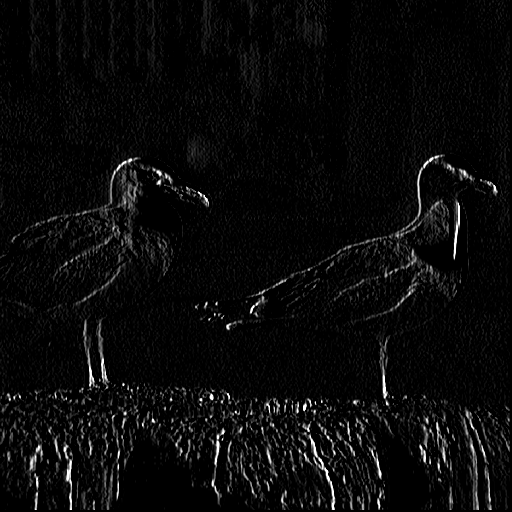

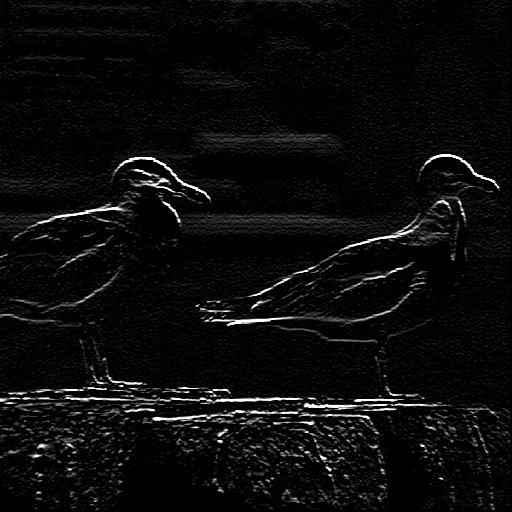

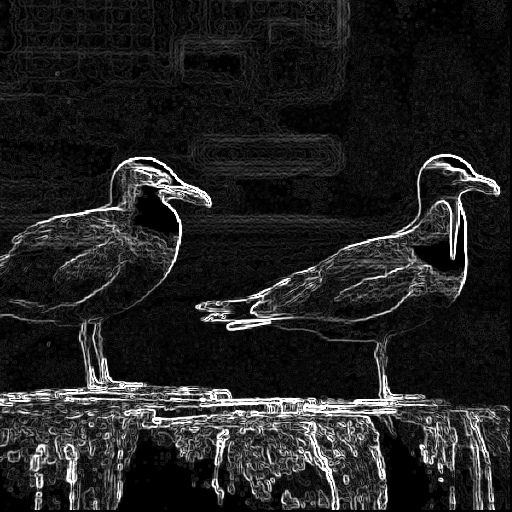

0

In [ ]:
img = cv2.imread('/content/butterfly.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('/content/city.png', cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread('/content/house.png', cv2.IMREAD_GRAYSCALE)
img4 = cv2.imread('/content/seagull.png', cv2.IMREAD_GRAYSCALE)

h4 = np.array([[1, 1, 1],[1, 1, 1],[1 ,1, 1]])*(1/9)
h9 = np.array([[1, 4, 6, 4, 1],[4, 16, 24, 16, 4],[6, 24, 36, 24, 6],[4, 16, 24, 16, 4],[1, 4, 6, 4, 1]])*(1/256)
h1 = np.array([[-1 ,0 ,1],[-2 ,0, 2], [-1 ,0 ,1]])
h2 = np.array([[-1 ,-2 ,-1],[0 ,0 ,0],[1 ,2 ,1]])

img_1 = convolucao(img4, h1)
img_2 = convolucao(img4, h2)
nova_imagem = np.sqrt(np.add(np.power(img_1,2), np.power(img_2,2)))

cv2_imshow(img_1)
cv2_imshow(img_2)
cv2_imshow(nova_imagem)

gc.collect()